### El dataset de modas

Comencemos importando TensorFlow.
link data = https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


Los datos de Fashion MNIST están disponibles directamente en la API de conjuntos de datos de `tf.keras`. Los cargas así:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

Llamar a `load_data` en este objeto nos dará dos conjuntos con los valores de entrenamiento y prueba para los gráficos que contienen las prendas y sus etiquetas.

In [3]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


¿Cómo se ven estos valores?

Imprimamos una imagen de entrenamiento y una etiqueta de entrenamiento para ver.

Label: 0
Matrix: [[  0   0   0   0   0   0   0   0   0   0 120  54   0   0   0   0  13 124   0   0   0   0   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0  64 173 207 218 206 232 184 168 202 205 218 202 126  12   0   0   1   0   0   0   0]
 [  0   0   0   0   0  56 199 223 222 207 205 211 223 227 231 230 214 203 209 220 213 164   0   0   2   0   0   0]
 [  0   0   0   0   0 191 219 200 200 206 206 205 206 206 203 202 201 202 201 195 198 222 149   0   0   0   0   0]
 [  0   0   0   0  72 224 201 205 208 202 204 204 205 205 208 205 192 188 203 202 200 189 198  23   0   0   0   0]
 [  0   0   0   0 160 221 211 200 204 203 204 203 201 202 201 203 201 185 203 203 188 194 207 126   0   0   0   0]
 [  0   0   0   0 227 212 224 205 201 204 203 202 202 201 201 200 201 195 198 191 182 199 202 202   0   0   0   0]
 [  0   0   0  20 208 205 224 219 201 200 202 202 201 201 199 198 199 199 197 183 195 210 191 189  11   0   0   0]
 [  0   0   0 138 223 201 218 229 216 202 202 200 200 197 197 1

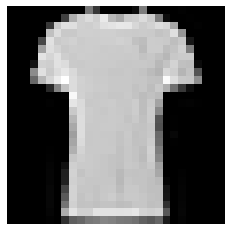

In [4]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 5999 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

### Preparación de los datos

Notarás que todos los valores están entre 0 y 255. Si estamos entrenando una red neuronal, por varias razones es más fácil si transformamos los valores para tratar todos con valores entre 0 y 1. Este proceso se llama **normalización**.

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Label: 6
Matrix: [[0.         0.         0.         0.         0.         0.         0.         0.         0.00392157 0.00392157 0.         0.         0.47058824 0.51372549 0.35686275 0.57647059 0.11764706
  0.         0.         0.00392157 0.00392157 0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.00392157 0.01176471 0.         0.         0.         0.         0.98431373 0.78039216 0.6745098  0.76470588 0.59607843
  0.         0.         0.         0.         0.01176471 0.00392157 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.16862745 0.48627451 0.75686275 0.65098039 0.9372549  1.         0.84705882 0.6745098
  0.89411765 0.49411765 0.23921569 0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.        

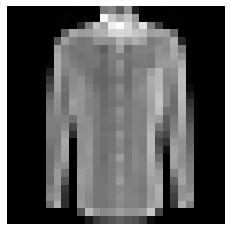

In [6]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=200)


# Set index of image to be seen
img_index = 3000 # 6000 -1

# Plot image
plt.imshow(training_images[img_index], cmap='gray')
plt.axis(False)

print("Label:", training_labels[img_index])
print("Matrix:", training_images[img_index])

In [7]:
training_images[0].shape

(28, 28)

### Creación del modelo



In [12]:
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    # TODO. Dense -> 256, ReLU
    # TODO. Dense -> 10, Softmax
])

### Entrenamiento del modelo

In [13]:
mlp_model.compile(
    optimizer=tf.optimizers.SGD(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
mlp_model.fit(training_images, training_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 2ms/step - loss: 0.7223 - accuracy: 0.7681
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5083 - accuracy: 0.8277
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4644 - accuracy: 0.8403


In [16]:
mlp_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (32, 784)                 0         
                                                                 
 dense (Dense)               (32, 256)                 200960    
                                                                 
 dense_1 (Dense)             (32, 10)                  2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Evaluación del modelo

In [17]:
mlp_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4813 - accuracy: 0.8323


[0.4813239872455597, 0.8323000073432922]

### Predicción


Label: 3
Prediction: 3


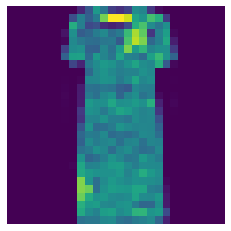

In [19]:
import random

test_index = random.randint(0, 10000 - 1)

plt.imshow(test_images[test_index], cmap='viridis')
plt.axis(False)

print("Label:", test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 784))
prediction = mlp_model.predict(np.expand_dims(input_image, axis=-1))
print("Prediction:", np.argmax(prediction))

In [20]:
prediction

array([[3.1072827e-02, 6.0727172e-02, 8.7945526e-03, 8.8915777e-01, 3.8930946e-03, 8.1943355e-05, 5.0187060e-03, 5.2055978e-04, 4.2951244e-04, 3.0391751e-04]], dtype=float32)

## **Ahora con convoluciones**

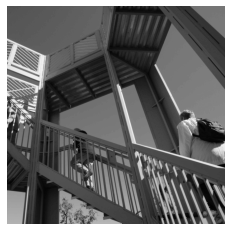

In [21]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


# We load a sample image
img = misc.ascent()

plt.imshow(img, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.show()

In [22]:
img_transformed = np.copy(img)
size_x = img_transformed.shape[0]
size_y = img_transformed.shape[1]

In [23]:
# Let's experiment with different values

filter = [[1, 2, 1], [2, 4, 2], [1, 2, 1]]
# filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

weight = 1/8

In [24]:
for x in range(1, size_x - 1):
  for y in range(1, size_y - 1):
      convolution = 0.0
      convolution = convolution + (img[x - 1, y - 1] * filter[0][0])
      convolution = convolution + (img[x, y - 1] * filter[0][1])
      convolution = convolution + (img[x + 1, y - 1] * filter[0][2])
      convolution = convolution + (img[x - 1, y] * filter[1][0])
      convolution = convolution + (img[x, y] * filter[1][1])
      convolution = convolution + (img[x + 1, y] * filter[1][2])
      convolution = convolution + (img[x - 1, y + 1] * filter[2][0])
      convolution = convolution + (img[x, y + 1] * filter[2][1])
      convolution = convolution + (img[x + 1, y + 1] * filter[2][2])
      convolution = convolution * weight
      
      if convolution < 0:
        convolution = 0
      if convolution > 255:
        convolution = 255
      
      img_transformed[x, y] = convolution

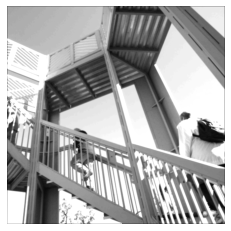

In [25]:
plt.imshow(img_transformed, cmap='gray')
plt.grid(False)
plt.axis('off')
plt.show()

### Creación del modelo

Para este modelo se agregarán algunas capas convolucionales.

Como inspiración, podemos recrear LeNet5 de Yann LeCun:

<img src="https://miro.medium.com/max/4348/1*PXworfAP2IombUzBsDMg7Q.png">

In [27]:
cnn_model = tf.keras.models.Sequential([
                                    
    # First conv layer + subsampling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second conv layer + subsampling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),# TODO. Conv2D -> 256, (3, 3), ReLU
    tf.keras.layers.MaxPooling2D(2, 2),# TODO. MaxPool

    # Third layer (flatten)
    tf.keras.layers.Flatten(),

    # Fourth layer (dense)
    tf.keras.layers.Dense(128, activation='relu' ),# TODO. Dense -> 128, ReLU

    # Fifth layer (output)
    tf.keras.layers.Dense(10, activation='softmax')
])

### Entrenamiento del modelo

In [28]:
cnn_model.compile(
    optimizer=tf.optimizers.SGD(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
cnn_model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4596 - accuracy: 0.8311
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4197 - accuracy: 0.8464
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3909 - accuracy: 0.8597
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3698 - accuracy: 0.8661
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3536 - accuracy: 0.8713
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3390 - accuracy: 0.8784
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3270 - accuracy: 0.8811
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3157 - accuracy: 0.8850
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3068 - accuracy: 0.8884
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.297

In [42]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

### Evaluación del modelo

In [31]:
cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3367 - accuracy: 0.8792


[0.33668819069862366, 0.8791999816894531]

### Predicción


Label: 7
Prediction: 7


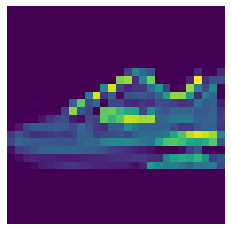

In [41]:
import random

test_index = random.randint(0, 10000 - 1)

plt.imshow(test_images[test_index], cmap='viridis')
plt.axis(False)

print("Label:", test_labels[test_index])
input_image = np.reshape(test_images[test_index], (1, 28, 28, 1))
prediction = cnn_model.predict(input_image)
print("Prediction:", np.argmax(prediction))

In [ ]:
# Guardar el Modelo
model.save('path_to_my_model.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
new_model = keras.models.load_model('path_to_my_model.h5')